### Program - Illustrate Custom Image Data Augmnentation Using Keras

In [1]:
import math
import warnings
import numpy as np

# ------------------------------------------------------------

%matplotlib inline
import matplotlib.pyplot as plt

# ------------------------------------------------------------

from skimage.io import imread
from skimage import img_as_float
from skimage import exposure, color
from skimage.transform import resize

# ------------------------------------------------------------

#from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image_dev import ImageDataGenerator

Using TensorFlow backend.


### Define - Data/Image Augmentation Parameters

In [2]:
# Data/Image Augmentation Parameters With Custom "Blurring" Parameter
datagen_1 = ImageDataGenerator(
        blurring = 3,
        zoom_range=0.2,
        rotation_range=40,
        fill_mode='nearest',        
        horizontal_flip=True,
        adaptive_equalization=False)

In [3]:
# Data/Image Augmentation Parameters With Custom "Contrast Limited Adaptive Histogram Equalization" Parameter
datagen_2 = ImageDataGenerator(        
        blurring = 0,
        zoom_range=0.2,
        rotation_range=40,
        fill_mode='nearest',        
        horizontal_flip=True,
        adaptive_equalization=True)

### Function - Plot Image

In [4]:
def plot_img(img):

    img_size = np.shape(img)[0]

    plt.imshow(img)

    plt.xticks([0,img_size//2,img_size-1])
    plt.yticks([0,img_size//2,img_size-1])

    plt.title("Intial Image")
    plt.show()

### Function - Plot Augmented Images

In [5]:
def pre_process_image(image, batch_size, datagen):

    fig = plt.figure(1, figsize=(4,4))
    fig.subplots_adjust(left=0.125, bottom=0.1, right=1.25, top=1.1,\
                        wspace=0.4,hspace=0.85)

    count = 1
    img_size = np.shape(image)[1]
    img_row = math.ceil(math.sqrt(batch_size))
    
    for imgs in datagen.flow(image, batch_size=batch_size):

        for j in imgs:

            plt.subplot(img_row, img_row, count)
            plt.imshow(j, interpolation="nearest")  
            plt.xticks([0,img_size//2,img_size-1])
            plt.yticks([0,img_size//2,img_size-1])
            count = count + 1     
            plt.gca()

        if count > batch_size:
            break

    fig.text(0.5, 1.25, "Augmented Images",fontsize=14)
    plt.show()

### Load and Resize Image

In [6]:
# Load Image
x_dog = imread("Dog.jpg")
x_cat = imread("Cat.jpg")

# Define Image Parameters
img_dim = 200
batch_size = 9
num_channel = 3

# Resize Image
x_dog = resize(x_dog, (img_dim, img_dim), mode='reflect')
x_cat = resize(x_cat, (img_dim, img_dim), mode='reflect')

### Visualize Image

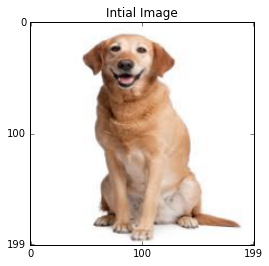

In [7]:
# Visualize Image
plot_img(x_dog)

In [8]:
# Convert Image To Tensor Form
x_dog = x_dog.reshape(1, img_dim, img_dim, num_channel)

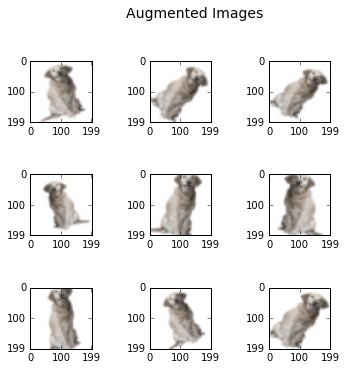

In [9]:
# Visualize Effects Of Image Augmentation On Image With Custom "Blurring" Parameter
pre_process_image(x_dog, batch_size, datagen_1)

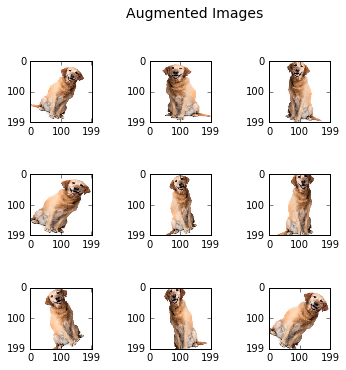

In [10]:
# Visualize Effects Of Image Augmentation On Image With Custom "Contrast Limited Adaptive Histogram Equalization" Parameter
pre_process_image(x_dog, batch_size, datagen_2)

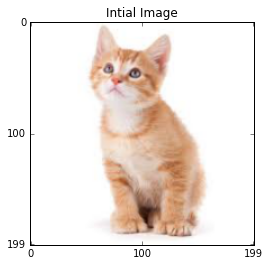

In [11]:
# Visualize Image
plot_img(x_cat)

In [12]:
# Convert Image To Tensor Form
x_cat = x_cat.reshape(1, img_dim, img_dim, num_channel)

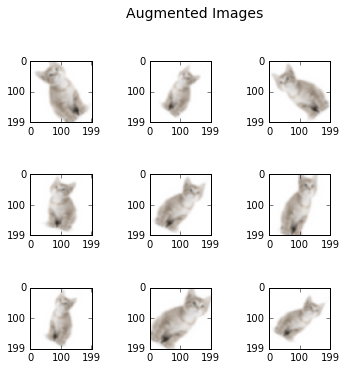

In [13]:
# Visualize Effects Of Image Augmentation On Image With Custom "Blurring" Parameter
pre_process_image(x_cat, batch_size, datagen_1)

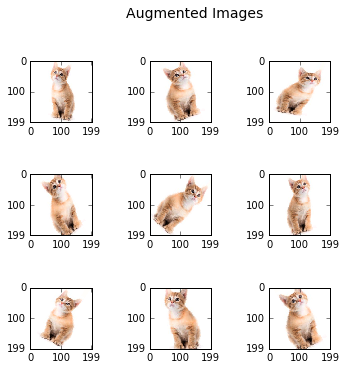

In [14]:
# Visualize Effects Of Image Augmentation On Image With Custom "Contrast Limited Adaptive Histogram Equalization" Parameter
pre_process_image(x_cat, batch_size, datagen_2)